# Naivé Bayes

## Loading adult_data

In [1]:
%matplotlib inline

In [11]:
import pandas as pd
import numpy as np

data = pd.read_csv("adult_data.csv")

data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Annual Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [12]:
data.shape

(32560, 15)

## Preprocessing

In [116]:
dataset = data.drop(['fnlwgt', 'Education', 'Relationship', 'Race', 'Sex'], axis=1)

In [5]:
# Check null values
missing_count = dataset.isnull().sum()
print(missing_count)

Age                  0
Workclass         1836
Education-num        0
Marital Status       0
Occupation        1843
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     583
Annual Income        0
dtype: int64


In [21]:
# Percentage of missing values
total_data = np.product(dataset.shape)
total_missing = missing_count.sum()
percentage = (total_missing/total_data) * 100
# Rounding by 2 decimals for the sake of readability
print(round(percentage, 2),'%')

1.31 %


## Convert the qualitative values to their numeric representations. 

---

#### There are 3 ways of doing this:

### Version 1: Manual

Note: This is horrible to do.

In [7]:
# Filling nulls with 0
dataset = pd.DataFrame(dataset.fillna(0))
dataset[20:25]

,Age,Workclass,Education-num,Marital Status,Occupation,Capital-gain,Capital-loss,Hours-per-week,Native-country,Annual Income
20,54,Private,9,Separated,Other-service,0,0,20,United-States,<=50K
21,35,Federal-gov,5,Married-civ-spouse,Farming-fishing,0,0,40,United-States,<=50K
22,43,Private,7,Married-civ-spouse,Transport-moving,0,2042,40,United-States,<=50K
23,59,Private,9,Divorced,Tech-support,0,0,40,United-States,<=50K
24,56,Local-gov,13,Married-civ-spouse,Tech-support,0,0,40,United-States,>50K


In [8]:
print("Unique values in 'Workclass':",dataset['Workclass'].unique())

dataset = dataset.replace([' Private', ' State-gov', ' Federal-gov', ' Local-gov',
                        ' Self-emp-not-inc', ' Self-emp-inc', ' Without-pay', ' Never-worked', None],
                       [1, 2, 3, 4, 5, 6, 7, 8, 0])

print("Unique values in 'Education':",dataset['Marital Status'].unique())


dataset = dataset.replace([' Married-civ-spouse', ' Married-AF-spouse', ' Married-spouse-absent',
                           ' Separated', ' Divorced', ' Widowed', ' Never-married'],
                         [1, 2 ,3, 4, 5, 6, 0])

print("Unique values in 'Occupation':",dataset['Occupation'].unique())
dataset = dataset.replace([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
                           ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
                           ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
                           ' Tech-support', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv'],
                          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])


num_list = [*range(1,41)]
print("Unique values in 'Native-country':",dataset['Native-country'].unique())
dataset = dataset.replace([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico', ' South',
 ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany', ' Iran',
 ' Philippines', ' Italy', ' Poland', ' Columbia', ' Cambodia', ' Thailand',
 ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
 ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan', ' Yugoslavia',
 ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
 ' Greece', ' Nicaragua', ' Vietnam' ' Hong', ' Ireland', ' Hungary',
 ' Holand-Netherlands'], [i for i in num_list])

dataset = dataset.replace([ " Vietnam", " Hong"],[37, 38])

print("Unique values in 'Annual Income':",dataset['Annual Income'].unique())

dataset = dataset.replace([" <=50K", " >50K"],[0,1])


dataset[10:20]

Unique values in 'Workclass': [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov' 0
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values in 'Education': [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values in 'Occupation': [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' 0 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Unique values in 'Native-country': [' United-States' ' Cuba' ' Jamaica' ' India' 0 ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(

,Age,Workclass,Education-num,Marital Status,Occupation,Capital-gain,Capital-loss,Hours-per-week,Native-country,Annual Income
10,30,2,13,1,3,0,0,40,4,1
11,23,1,13,0,5,0,0,30,1,0
12,32,1,12,0,6,0,0,50,1,0
13,40,1,11,1,7,0,0,40,0,1
14,34,1,4,1,8,0,0,45,5,0
15,25,5,9,0,9,0,0,35,1,0
16,32,1,9,0,10,0,0,40,1,0
17,38,1,7,1,6,0,0,50,1,0
18,43,5,14,5,1,0,0,45,1,1
19,40,1,16,1,3,0,0,60,1,1


### Version 2: Pandas get_dummies

Note: This is quite horrible due to getting absurd amount of columns

In [32]:
data = pd.read_csv("adult_data.csv")

dataset = data.drop(['fnlwgt', 'Education', 'Relationship', 'Race', 'Sex'], axis=1)

# Filling nulls with 0
dataset = pd.DataFrame(dataset.fillna(0))
dataset[20:25]

dataset.head()

,Age,Workclass,Education-num,Marital Status,Occupation,Capital-gain,Capital-loss,Hours-per-week,Native-country,Annual Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,0,0,40,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,0,0,40,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,0,0,40,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,0,0,40,United-States,<=50K


In [33]:
print("Unique values in 'Workclass':\n",dataset['Workclass'].unique())
print("\nUnique values in 'Marital Status':\n",dataset['Marital Status'].unique())
print("\nUnique values in 'Occupation':\n",dataset['Occupation'].unique())
print("\nUnique values in 'Native-country':\n",dataset['Native-country'].unique())
print("\nUnique values in 'Annual Income':\n",dataset['Annual Income'].unique())

Unique values in 'Workclass':
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov' 0
 ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values in 'Marital Status':
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique values in 'Occupation':
 [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' 0 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Unique values in 'Native-country':
 [' United-States' ' Cuba' ' Jamaica' ' India' 0 ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' 

#### Create dummy variables with 0/1 values for each possible value a.k.a. One hot encoding.

In [34]:
dataset_dummy = pd.get_dummies(dataset)
dataset_dummy = dataset_dummy.drop(['Annual Income_ <=50K', 'Annual Income_ >50K'], axis=1)
dataset_dummy['Annual Income'] = dataset['Annual Income']
dataset_dummy = dataset_dummy.replace([" <=50K", " >50K"],[0,1])
dataset_dummy.head()

,Age,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_0,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Annual Income
0,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,14,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


---

## Version 3: Skicit-learn LabelEncoder

### This is what we're using:

In [163]:
dataset = data.drop(['fnlwgt', 'Education', 'Relationship', 'Race', 'Sex'], axis=1)

# Create temporary dataset for holding in the original meaning of the values we're about to change
dataset_temp = dataset
dataset_temp.head()

,Age,Workclass,Education-num,Marital Status,Occupation,Capital-gain,Capital-loss,Hours-per-week,Native-country,Annual Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,0,0,40,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,0,0,40,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,0,0,40,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,0,0,40,United-States,<=50K


In [165]:
from sklearn import preprocessing

# LabelEncoder requires all the values in a column to be string or int. If there is 0 in a named column, or None, it throws and error.
dataset = pd.DataFrame(dataset.fillna("None"))

# Initiolize lists for the changed elements, were gonna use these later
workclass = []
occupation = []
native_country = []
le_test = []

def encode_features(df_train):
    features = ['Workclass', 'Marital Status', 'Occupation', 'Native-country', 'Annual Income']
    df_combined = pd.concat([df_train[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        
        le_test.append(list(set(le.transform(df_train[feature]))))
        
        df_train[feature] = le.transform(df_train[feature])
    return df_train
    
dataset = encode_features(dataset)

dataset.head(10)

,Age,Workclass,Education-num,Marital Status,Occupation,Capital-gain,Capital-loss,Hours-per-week,Native-country,Annual Income
0,50,5,13,2,3,0,0,13,38,0
1,38,3,9,0,5,0,0,40,38,0
2,53,3,7,2,5,0,0,40,38,0
3,28,3,13,2,9,0,0,40,4,0
4,37,3,14,2,3,0,0,40,38,0
5,49,3,5,3,7,0,0,16,22,0
6,52,5,9,2,3,0,0,45,38,1
7,31,3,14,4,9,14084,0,50,38,1
8,42,3,13,2,3,5178,0,40,38,1
9,37,3,10,2,3,0,0,80,38,1


### Note:

- "<=50K" = 0
- ">50K" = 1

All of this is for later use.

In [168]:
for i in zip(list(dataset_temp['Workclass'].unique()), le_test[0]):
    workclass.append(i)
print("Workclass: ",workclass,"\n")

for j in zip(list(dataset_temp['Occupation'].unique()), le_test[2]):
    occupation.append(j)
print("Occupation: ",occupation,"\n")

for k in zip(list(dataset_temp['Native-country'].unique()), le_test[3]):
    native_country.append(k)
print("Native-country: ",native_country)

Workclass:  [(' Self-emp-not-inc', 0), (' Private', 1), (' State-gov', 2), (' Federal-gov', 3), (' Local-gov', 4), (nan, 5), (' Self-emp-inc', 6), (' Without-pay', 7), (' Never-worked', 8), (' Self-emp-not-inc', 0), (' Private', 1), (' State-gov', 2), (' Federal-gov', 3), (' Local-gov', 4), (nan, 5), (' Self-emp-inc', 6), (' Without-pay', 7), (' Never-worked', 8), (' Self-emp-not-inc', 0), (' Private', 1), (' State-gov', 2), (' Federal-gov', 3), (' Local-gov', 4), (nan, 5), (' Self-emp-inc', 6), (' Without-pay', 7), (' Never-worked', 8)] 

Occupation:  [(' Exec-managerial', 0), (' Handlers-cleaners', 1), (' Prof-specialty', 2), (' Other-service', 3), (' Adm-clerical', 4), (' Sales', 5), (' Craft-repair', 6), (' Transport-moving', 7), (' Farming-fishing', 8), (' Machine-op-inspct', 9), (' Tech-support', 10), (nan, 11), (' Protective-serv', 12), (' Armed-Forces', 13), (' Priv-house-serv', 14), (' Exec-managerial', 0), (' Handlers-cleaners', 1), (' Prof-specialty', 2), (' Other-service', 

## Mean values of each column

In [26]:
mean_1 = np.mean(dataset)
std_1 =np.std(dataset)

print(mean_1,"\n")
print(std_1)

Age                 38.581634
Workclass            3.376290
Education-num       10.080590
Marital Status       2.611794
Occupation           6.421959
Capital-gain      1077.615172
Capital-loss        87.306511
Hours-per-week      40.437469
Native-country      36.470823
Annual Income        0.240817
dtype: float64 

Age                 13.640432
Workclass            1.581971
Education-num        2.572669
Marital Status       1.506202
Occupation           4.328473
Capital-gain      7385.289585
Capital-loss       402.959928
Hours-per-week      12.347428
Native-country       6.083086
Annual Income        0.427579
dtype: float64


### Correlation matrix

<AxesSubplot:>

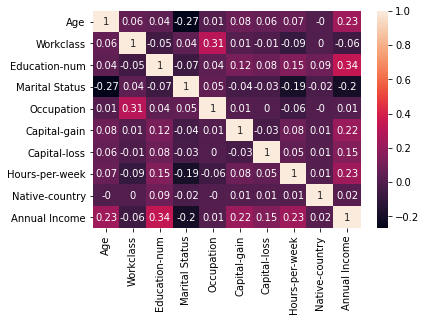

In [27]:
import seaborn as sns 

correlation_matrix = dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

## Outliers

In [68]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 = np.std(data_1)
    
    
    for y in data_1:
        z_score = (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

total_percentage = 0

for i in dataset:
    outlier_datapoints = detect_outlier(dataset[i])
    print(f"Amount of outliers in {i}:  {len(outlier_datapoints)}")

    total_data = np.product(dataset.shape)
    total_outliers = len(outlier_datapoints)
    percentage = (total_outliers/total_data) * 100
    print("Percentage of the outliers related to the table: ", round(percentage, 2),'%\n')
    total_percentage += percentage
    outliers = []
    
print("Total outliers in table: ",round(total_percentage, 2),"%")

#print(len(outlier_datapoints))

Amount of outliers in Age:  121
Percentage of the outliers related to the table:  0.04 %

Amount of outliers in Workclass:  0
Percentage of the outliers related to the table:  0.0 %

Amount of outliers in Education-num:  219
Percentage of the outliers related to the table:  0.07 %

Amount of outliers in Marital Status:  0
Percentage of the outliers related to the table:  0.0 %

Amount of outliers in Occupation:  0
Percentage of the outliers related to the table:  0.0 %

Amount of outliers in Capital-gain:  215
Percentage of the outliers related to the table:  0.07 %

Amount of outliers in Capital-loss:  1470
Percentage of the outliers related to the table:  0.45 %

Amount of outliers in Hours-per-week:  440
Percentage of the outliers related to the table:  0.14 %

Amount of outliers in Native-country:  1113
Percentage of the outliers related to the table:  0.34 %

Amount of outliers in Annual Income:  0
Percentage of the outliers related to the table:  0.0 %

Total outliers in table:  

### Because the outliers make up under 5% of the overall data, we don't have to manage them.

---

# Naïve Bayes Algorithm

In probability theory and statistics, Bayes's theorem (alternatively Bayes's law or Bayes's rule), named after Reverend Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

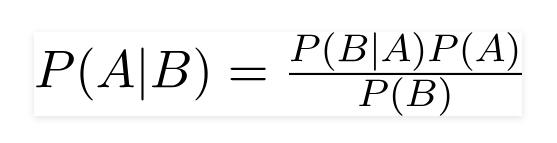

Using Bayes theorem, we can find the probability of **A** happening, given that **B** has occurred. 

Here, **B** is the evidence and **A** is the hypothesis. 

- The assumption made here is that the predictors/features are independent. 

- That is presence of one particular feature does not affect the other. 

#### Hence it is called **naivé**.

---

#### It's easier if we change the values to fit this dataset:

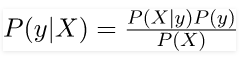


- Basically, we are trying to find **probability** of event **y**, given the event **X** is **true**. 
    - Event **X** is also termed as evidence.
- **P(y)** is the **priori** of **y** (the prior probability, i.e. Probability of event before evidence is seen).
    - The evidence is an attribute value of an unknown instance(here, it is event **X**).
- **P(y/X)** is a **posteriori** probability of **X**, (i.e. probability of event after evidence is seen.)

### Exercise 15: Applying the GaussianNB Algorithm

---

In [ ]:
dataset = pd.read_csv("fertility_Diagnosis.csv", header=None)

dataset.head()

In [ ]:
# Split the data into X and Y, considering that the class label is found under the column with an index equal to 9.
X = dataset.iloc[:,:9]
Y = dataset.iloc[:,9]

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initializing Gaussian Naïve Bayes class
model = GaussianNB()
# Fit training data to train the model
model.fit(X, Y)

In [ ]:
# Perform a prediction using the model for a new instance with the following values for each feature:
pred = model.predict([[-0.33,0.69,0,1,1,0,0.8,0,0.88]])
print(pred)

# Activity 11: Training a Naïve Bayes Model for Our Census Income Dataset

1. Using the preprocessed Census Income Dataset, separate the features from the target by creating the variables X and Y.

2. Divide the dataset into training, validation, and testing sets, using a split ratio of 10%.

Note:

When all three sets are created from the same dataset, it is not required to create
an additional train/dev set to measure data mismatch. Moreover, note that it is
OK to try a different split ratio, considering that the percentages explained in the
previous chapter are not set in stone. Even though they tend to work well, it is
important that you embrace experimentation in different levels when building
machine learning models.

3. Import the Gaussian Naïve Bayes class, and then use the fit method to train the odel over the training sets (X_train and _train).

4. Finally, perform a prediction using the model that you trained previously, for a new nstance with the following values for each feature: 39, 6, 13, 4, 0, 2174, 0, 40, 38. he prediction for the individual should be equal to zero, meaning that the ndividual most likely has an income less than or equal to 50K.

In [237]:
X = dataset.iloc[:,:9]
Y = dataset.iloc[:,9]

print(X.shape)
print(Y.shape)

(32560, 9)
(32560,)


In [238]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1, stratify=Y)

print('Labels counts in y: {}'.format(np.bincount(Y)))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [24719  7841]
Labels counts in y_train: [22247  7057]
Labels counts in y_test: [2472  784]


In [246]:
from sklearn.naive_bayes import GaussianNB

# Initializing Gaussian Naïve Bayes class
model = GaussianNB()
# Fit training data to train the model
model.fit(x_train, y_train)

GaussianNB()

In [247]:
pred = model.predict([[39, 6, 13, 4, 0, 2174, 0, 40, 38.0]])
print(pred)

[0]


### The output being 0 means that the individual most likely has an income less than or equal to 50K.

# Pipeline & GridSearchCV

In [252]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("gaus",GaussianNB())])

pipeline.fit(x_train, y_train)
pipeline.score(x_train, y_train)

0.7982527982527983

In [261]:
from sklearn.model_selection import GridSearchCV

# The level of smoothing default if 1e-09

'''Originally smoothing var just the rnums, 0-1 000 000 000, but jupyter kept crashing'''

pipeline = Pipeline([("scaler", StandardScaler()),
                       ("gaussian", GaussianNB())])

print(pipeline.get_params().keys())

parameters = {'gaussian__var_smoothing':[1_000_000_000, 1_000_000_000_000, 800_000_000, 900_000_000, 947345884]}
#grid_search = GridSearchCV(model_classifier, parameters, cv = 10, n_jobs=-1) 
grid_search = GridSearchCV(pipeline, parameters, cv = 10, n_jobs=-1)

grid_search.fit(x_train, y_train)

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'gaussian', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'gaussian__priors', 'gaussian__var_smoothing'])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gaussian', GaussianNB())]),
             n_jobs=-1,
             param_grid={'gaussian__var_smoothing': [1000000000, 1000000000000,
                                                     800000000, 900000000,
                                                     947345884]})

In [262]:
grid_search.best_params_

{'gaussian__var_smoothing': 1000000000}

Note :I did this earlier with value 0-1 000 000 000 and it gave me this value:

**{'var_smoothing': 947345884}**

#### So this is really the most optimal smoothing value

### Accuracy score

In [81]:
grid_search.best_score_

0.7591796414228041

In [82]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(x_test)

accuracy_score(y_test,y_pred)

0.7592137592137592

### So the accuracy of prediction of the model is about 76%

## Doing a prediction

- Trying to find **probability** of **'Annual Income'** being either **0** or **1**, given the  **Age** is **true**. 
- **P('Annual Income')** is the **priori** of **'Annual Income'** (the prior probability, i.e. Probability of event before evidence is seen).
- **'Age'** is the evidence
- **P('Annual Income'/'Age')** is a **posteriori** probability of **'Age'**, (i.e. probability of event after evidence is seen.)

In [284]:
ids = dataset['Workclass']
predictions = model.predict(dataset.drop('Workclass', axis=1))


output = pd.DataFrame({ 'Workclass' : ids, 'Annual Income': predictions })

lst = []
test = []
test_num = []
for i in workclass:
    lst.append(list(i))
print(lst)

for h in lst:
    test.append(h[0])
    test_num.append(h[1])
print(test)
print(test_num)

output['Workclass'] = output['Workclass'].replace([e for e in set(test_num)], [f for f in set(test)])

output.head(10)

[[' Self-emp-not-inc', 0], [' Private', 1], [' State-gov', 2], [' Federal-gov', 3], [' Local-gov', 4], [nan, 5], [' Self-emp-inc', 6], [' Without-pay', 7], [' Never-worked', 8], [' Self-emp-not-inc', 0], [' Private', 1], [' State-gov', 2], [' Federal-gov', 3], [' Local-gov', 4], [nan, 5], [' Self-emp-inc', 6], [' Without-pay', 7], [' Never-worked', 8], [' Self-emp-not-inc', 0], [' Private', 1], [' State-gov', 2], [' Federal-gov', 3], [' Local-gov', 4], [nan, 5], [' Self-emp-inc', 6], [' Without-pay', 7], [' Never-worked', 8]]
[' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov', ' Local-gov', nan, ' Self-emp-inc', ' Without-pay', ' Never-worked', ' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov', ' Local-gov', nan, ' Self-emp-inc', ' Without-pay', ' Never-worked', ' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov', ' Local-gov', nan, ' Self-emp-inc', ' Without-pay', ' Never-worked']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5

,Workclass,Annual Income
0,State-gov,0
1,Private,0
2,Private,0
3,Private,0
4,Private,0
5,Private,0
6,State-gov,0
7,Private,0
8,Private,0
9,Private,0


In [89]:
ids = X['Workclass']
predictions = grid_search.predict(dataset.drop('Age', axis=1))


output = pd.DataFrame({ 'Age' : ids, 'Annual Income': predictions })
# output.to_csv('titanic-predictions.csv', index = False)
output.head(10)

,Age,Annual Income
0,50,0
1,38,0
2,53,0
3,28,0
4,37,0
5,49,0
6,52,0
7,31,0
8,42,0
9,37,0


### As we can see, the model predicts succefully

# Decision Tree Algorithm

### Exercise 16: Applying the Decision Tree Algorithm 

In [44]:
import pandas as pd
data = pd.read_csv("fertility_Diagnosis.csv", header=None)

In [45]:
X = data.iloc[:,:9]
Y = data.iloc[:,9]

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, Y)

DecisionTreeClassifier()

In [47]:
pred = model.predict([[-0.33,0.69,0,1,1,0,0.8,0,0.88]])
print(pred)

['N']


# Activity 12: Training a Decision Tree Model for Our Census Income Dataset

In [194]:
X = dataset.iloc[:,:9]
Y = dataset.iloc[:,9]

In [195]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1, stratify=Y)

print('Labels counts in y: {}'.format(np.bincount(Y)))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [24719  7841]
Labels counts in y_train: [22247  7057]
Labels counts in y_test: [2472  784]


In [287]:
from sklearn.tree import DecisionTreeClassifier
# Initialize DecisionTreeClassifier class
model = DecisionTreeClassifier()
# Train the model with X & Y
model.fit(X, Y)

DecisionTreeClassifier()

In [288]:
pred = model.predict([[39, 6, 13, 4, 0, 2174, 0, 40, 38]])
print(pred)

[0]


# Pipeline & GridSearchCV

In [289]:
pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("dt",DecisionTreeClassifier())])

pipeline.fit(x_train, y_train)
pipeline.score(x_train, y_train)

0.971061971061971

In [290]:
from sklearn.model_selection import GridSearchCV

print(pipeline.get_params().keys())

parameters = {'dt__class_weight':(["balanced", None]),
              'dt__criterion':(["gini", "entropy"]),
              'dt__max_features':(["auto", "sqrt", "log2", None]),
              'dt__splitter':(["best","random"])}

grid_search = GridSearchCV(pipeline, parameters, cv = 10, n_jobs=-1)  

model_classifier.get_params().keys()
grid_search.fit(x_train, y_train)

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'dt', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'dt__ccp_alpha', 'dt__class_weight', 'dt__criterion', 'dt__max_depth', 'dt__max_features', 'dt__max_leaf_nodes', 'dt__min_impurity_decrease', 'dt__min_impurity_split', 'dt__min_samples_leaf', 'dt__min_samples_split', 'dt__min_weight_fraction_leaf', 'dt__presort', 'dt__random_state', 'dt__splitter'])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__class_weight': ['balanced', None],
                         'dt__criterion': ['gini', 'entropy'],
                         'dt__max_features': ['auto', 'sqrt', 'log2', None],
                         'dt__splitter': ['best', 'random']})

In [291]:
grid_search.best_params_

{'dt__class_weight': None,
 'dt__criterion': 'entropy',
 'dt__max_features': 'sqrt',
 'dt__splitter': 'best'}

In [292]:
grid_search.best_score_

0.8218334666615432

In [293]:
pred = grid_search.predict([[-0.33,0.69,0,1,1,0,0.8,0,0.88]])
print(pred)

[1]


### This time, output is 1, meaning the person is likely to have income of over 50K

In [366]:
ids = X['Native-country']
predictions = model.predict(dataset.drop('Native-country', axis=1))


output = pd.DataFrame({ 'Native-country' : ids, 'Annual Income': predictions })

lst = []
test = []
test_num = []
for i in native_country:
    lst.append(list(i))
print(lst)

for h in lst:
    test.append(h[0])
    test_num.append(h[1])
print(test)
print(test_num)

output['Native-country'] = output['Native-country'].replace([e for e in set(test_num)], [f for f in set(test)])

output.head(10)

[[' United-States', 0], [' Cuba', 1], [' Jamaica', 2], [' India', 3], [nan, 4], [' Mexico', 5], [' South', 6], [' Puerto-Rico', 7], [' Honduras', 8], [' England', 9], [' Canada', 10], [' Germany', 11], [' Iran', 12], [' Philippines', 13], [' Italy', 14], [' Poland', 15], [' Columbia', 16], [' Cambodia', 17], [' Thailand', 18], [' Ecuador', 19], [' Laos', 20], [' Taiwan', 21], [' Haiti', 22], [' Portugal', 23], [' Dominican-Republic', 24], [' El-Salvador', 25], [' France', 26], [' Guatemala', 27], [' China', 28], [' Japan', 29], [' Yugoslavia', 30], [' Peru', 31], [' Outlying-US(Guam-USVI-etc)', 32], [' Scotland', 33], [' Trinadad&Tobago', 34], [' Greece', 35], [' Nicaragua', 36], [' Vietnam', 37], [' Hong', 38], [' Ireland', 39], [' Hungary', 40], [' Holand-Netherlands', 41], [' United-States', 0], [' Cuba', 1], [' Jamaica', 2], [' India', 3], [nan, 4], [' Mexico', 5], [' South', 6], [' Puerto-Rico', 7], [' Honduras', 8], [' England', 9], [' Canada', 10], [' Germany', 11], [' Iran', 12

,Native-country,Annual Income
0,Mexico,0
1,Mexico,0
2,Mexico,1
3,Germany,0
4,Mexico,1
5,Scotland,0
6,Mexico,1
7,Mexico,1
8,Mexico,1
9,Mexico,0


### Exercise 17: Applying the SVM Algorithm 

In [55]:
import pandas as pd
data = pd.read_csv("fertility_Diagnosis.csv", header=None)

In [56]:
X = data.iloc[:,:9]
Y = data.iloc[:,9]

In [57]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, Y)

SVC()

In [58]:
pred = model.predict([[-0.33,0.69,0,1,1,0,0.8,0,0.88]])
print(pred)

['N']


# Activity 13: Training an SVM Model for Our Census Income Dataset

In [209]:
X = dataset.iloc[:,:9]
Y = dataset.iloc[:,9]

print(X)
print(Y)

       Age  Workclass  Education-num  Marital Status  Occupation  \
0       50          5             13               2           3   
1       38          3              9               0           5   
2       53          3              7               2           5   
3       28          3             13               2           9   
4       37          3             14               2           3   
...    ...        ...            ...             ...         ...   
32555   27          3             12               2          12   
32556   40          3              9               2           6   
32557   58          3              9               6           0   
32558   22          3              9               4           0   
32559   52          4              9               2           3   

       Capital-gain  Capital-loss  Hours-per-week  Native-country  
0                 0             0              13              38  
1                 0             0              

In [210]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1, stratify=Y)

print('Labels counts in y: {}'.format(np.bincount(Y)))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [24719  7841]
Labels counts in y_train: [22247  7057]
Labels counts in y_test: [2472  784]


In [211]:
from sklearn.svm import SVC
import time

start_time = time.time()

# Initialize Support Vector Machine
model = SVC()
# Train the model
model.fit(X, Y)

print("Time: ", time.time() - start_time)

Time:  11.844985008239746


I had to check the time with this one, because it took considerably longer than the other methods, which were under a second

In [212]:
pred = model.predict([[39, 6, 13, 4, 0, 2174, 0, 40, 38]])
print(pred)

[0]


# Pipeline & GridSearchCV

In [269]:
pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("svc",SVC())])

pipeline.fit(x_train, y_train)
pipeline.score(x_train, y_train)

0.8523068523068523

In [271]:
from sklearn.model_selection import GridSearchCV

print(pipeline.get_params().keys())

parameters = {'svc__class_weight':(["balanced",None]),
              'svc__decision_function_shape':(["ovo","ovr"]),
              'svc__gamma':(["scale","auto"]),
              'svc__kernel':(["linear", "poly", "rbf", "sigmoid", "precomputed"])}


grid_search = GridSearchCV(pipeline, parameters, cv = 10, n_jobs=-1) 

model_classifier.get_params().keys()
grid_search.fit(x_train, y_train)

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'svc', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__class_weight': ['balanced', None],
                         'svc__decision_function_shape': ['ovo', 'ovr'],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed']})

In [282]:
grid_search.best_params_

{'svc__class_weight': None,
 'svc__decision_function_shape': 'ovo',
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf'}

In [283]:
grid_search .best_score_

0.8481093594074405

In [286]:
pred = grid_search.predict([[-0.33,0.69,0,1,1,0,0.8,0,0.88]])
print(pred)

[0]


In [285]:
ids = X['Occupation']
predictions = model.predict(dataset.drop('Occupation', axis=1))


output = pd.DataFrame({ 'Occupation' : ids, 'Annual Income': predictions })

lst = []
test = []
test_num = []
for i in occupation:
    lst.append(list(i))
print(lst)

for h in lst:
    test.append(h[0])
    test_num.append(h[1])
print(test)
print(test_num)

output['Occupation'] = output['Occupation'].replace([e for e in set(test_num)], [f for f in set(test)])

output.head(10)

[[' Exec-managerial', 0], [' Handlers-cleaners', 1], [' Prof-specialty', 2], [' Other-service', 3], [' Adm-clerical', 4], [' Sales', 5], [' Craft-repair', 6], [' Transport-moving', 7], [' Farming-fishing', 8], [' Machine-op-inspct', 9], [' Tech-support', 10], [nan, 11], [' Protective-serv', 12], [' Armed-Forces', 13], [' Priv-house-serv', 14], [' Exec-managerial', 0], [' Handlers-cleaners', 1], [' Prof-specialty', 2], [' Other-service', 3], [' Adm-clerical', 4], [' Sales', 5], [' Craft-repair', 6], [' Transport-moving', 7], [' Farming-fishing', 8], [' Machine-op-inspct', 9], [' Tech-support', 10], [nan, 11], [' Protective-serv', 12], [' Armed-Forces', 13], [' Priv-house-serv', 14], [' Exec-managerial', 0], [' Handlers-cleaners', 1], [' Prof-specialty', 2], [' Other-service', 3], [' Adm-clerical', 4], [' Sales', 5], [' Craft-repair', 6], [' Transport-moving', 7], [' Farming-fishing', 8], [' Machine-op-inspct', 9], [' Tech-support', 10], [nan, 11], [' Protective-serv', 12], [' Armed-Forc

,Occupation,Annual Income
0,Armed-Forces,0
1,Exec-managerial,0
2,Exec-managerial,0
3,Adm-clerical,0
4,Armed-Forces,0
5,Machine-op-inspct,0
6,Armed-Forces,0
7,Adm-clerical,0
8,Armed-Forces,0
9,Armed-Forces,0


### So a person who has an annual income equal or under 50K, works in the Armed-Forces

---

### Garbage:

In [254]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

        # highlight test examples with circles
        if test_idx:
            # plot all examples
            X_test, y_test = X[test_idx, :], y[test_idx]

            plt.scatter(X_test[:, 0], X_test[:, 1],
                        c='', edgecolor='black', alpha=1.0,
                        linewidth=1, marker='o',
                        s=100, label='test set')

In [255]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

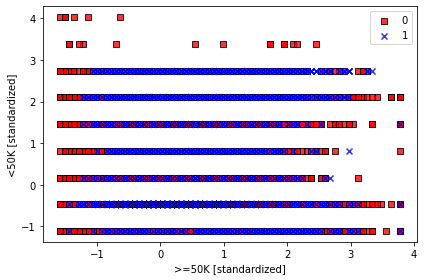

In [257]:
pipeline_order = [('scaler', StandardScaler()), ('gaussian', GaussianNB(var_smoothing=947345884))]
pipeline = Pipeline(pipeline_order)
  
gaussian_classifier_scaled = pipeline.fit(x_train_std, y_train)
 

plot_decision_regions(x_combined_std, y_combined, 
                          classifier=gaussian_classifier_scaled, test_idx=range(32559,32559))

plt.xlabel('>=50K [standardized]')
plt.ylabel('<50K [standardized]')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [111]:
knn_scores = pd.DataFrame(grid_search.cv_results_)
knn_scores.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0110,3.032655e-03,0.002501,9.220566e-04,1000000000,{'var_smoothing': 1000000000},0.759127,0.759127,0.759127,0.759127,0.759386,0.759386,0.759386,0.759044,0.759044,0.759044,0.75918,0.000139,1
1,0.0095,4.997036e-04,0.002001,1.018246e-06,1000000000000,{'var_smoothing': 1000000000000},0.759127,0.759127,0.759127,0.759127,0.759386,0.759386,0.759386,0.759044,0.759044,0.759044,0.75918,0.000139,1
2,0.0090,4.402682e-07,0.002000,5.336530e-07,800000000,{'var_smoothing': 800000000},0.759127,0.759127,0.759127,0.759127,0.759386,0.759386,0.759386,0.759044,0.759044,0.759044,0.75918,0.000139,1
3,0.0090,5.766576e-07,0.001900,2.997884e-04,900000000,{'var_smoothing': 900000000},0.759127,0.759127,0.759127,0.759127,0.759386,0.759386,0.759386,0.759044,0.759044,0.759044,0.75918,0.000139,1
4,0.0090,5.786257e-07,0.002000,5.113509e-07,947345884,{'var_smoothing': 947345884},0.759127,0.759127,0.759127,0.759127,0.759386,0.759386,0.759386,0.759044,0.759044,0.759044,0.75918,0.000139,1


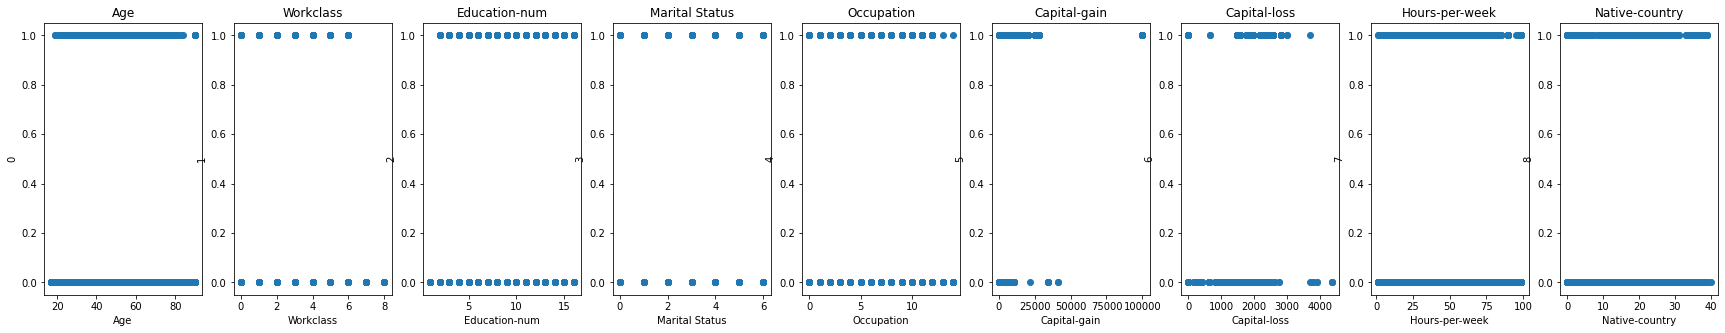

In [253]:
plt.figure(figsize=(30, 5))
features = X.columns

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    #x = dataset[col]
    y = Y
    x = X[col]
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(i)